# **Capstone project: Providing data-driven suggestions for HR**

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below.

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## Step 1. Importing Libraries



In [3]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# RUN THIS CELL TO IMPORT YOUR DATA.

# Load dataset into a dataframe
df = pd.read_csv("/content/HR_comma_sep.csv")


# Display first few rows of the dataframe
df.head(5)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [5]:
# Gather basic information about the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [6]:
# Gather descriptive statistics about the data
df.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [7]:
# Display all column names
print(df.columns)

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')


In [8]:
# Rename columns as needed
df = df.rename(columns={'satisfaction_level': 'Satisfaction score', 'last_evaluation': 'Employee score','number_project': 'No. of project', 'average_montly_hours': 'Monthly hrs (avg)', 'time_spend_company': 'Tenure (Yrs)', 'Work_accident': 'Accident during work', 'left': 'Employment', 'promotion_last_5years': 'Promotion (Last 5 yrs)', 'salary': 'Salary'})

# Display all column names after the update
df.head(5)


,Satisfaction score,Employee score,No. of project,Monthly hrs (avg),Tenure (Yrs),Accident during work,Employment,Promotion (Last 5 yrs),Department,Salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check missing values

Check for any missing values in the data.

In [9]:
# Check for missing values
df.isnull().sum()

,0
Satisfaction score,0
Employee score,0
No. of project,0
Monthly hrs (avg),0
Tenure (Yrs),0
Accident during work,0
Employment,0
Promotion (Last 5 yrs),0
Department,0
Salary,0


### Check duplicates

Check for any duplicate entries in the data.

In [10]:
# Check for duplicates
df.duplicated().sum()

3008

In [11]:
# Inspect some rows containing duplicates as needed
duplicates = df[df.duplicated(keep=False)]
duplicates.head(5)

,Satisfaction score,Employee score,No. of project,Monthly hrs (avg),Tenure (Yrs),Accident during work,Employment,Promotion (Last 5 yrs),Department,Salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [12]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df = df.drop_duplicates()

# Display first few rows of new dataframe as needed
df.head(5)

,Satisfaction score,Employee score,No. of project,Monthly hrs (avg),Tenure (Yrs),Accident during work,Employment,Promotion (Last 5 yrs),Department,Salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

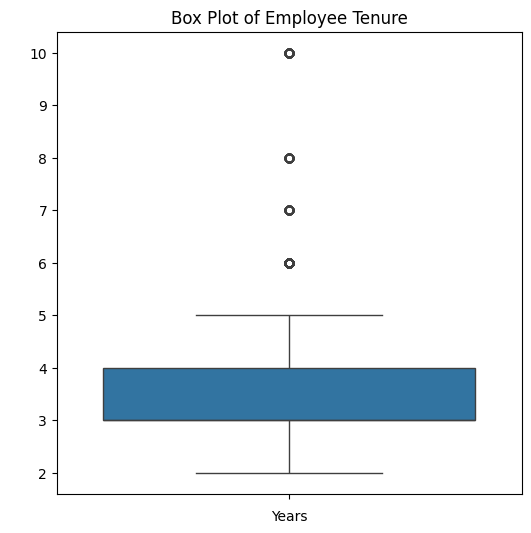

In [13]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(6, 6))
sns.boxplot(df['Tenure (Yrs)'])
plt.title('Box Plot of Employee Tenure')
plt.ylabel(' ')
plt.xlabel('Years')
plt.show()

In [14]:
# Determine the number of rows containing outliers

# Compute the 25th percentile value in `tenure`
percentile25 = df['Tenure (Yrs)'].quantile(0.25)

# Compute the 75th percentile value in `tenure`
percentile75 = df['Tenure (Yrs)'].quantile(0.75)

# Compute the interquartile range in `tenure`
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `tenure`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `tenure`
outliers = df[(df['Tenure (Yrs)'] > upper_limit) | (df['Tenure (Yrs)'] < lower_limit)]

# Count how many rows in the data contain outliers in `tenure`
print("No. of outliers in `Tenure`:", len(outliers))

Lower limit: 1.5
Upper limit: 5.5
No. of outliers in `Tenure`: 824


## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

Left the company :  1991
Stayed in company:  10000

Left the company: 16.60%
Stayed in company: 83.40%


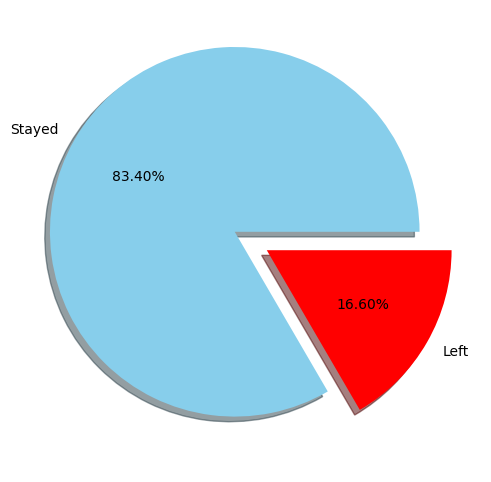

In [15]:
# Get numbers of people who left vs. stayed
left_the_company = 0
stayed_in_company = 0
employment_count = df['Employment'].value_counts()
for i in df['Employment']:
    if i==1:
        left_the_company += 1
    else:
        stayed_in_company += 1
print('Left the company : ', left_the_company)
print('Stayed in company: ', stayed_in_company)

# Get percentages of people who left vs. stayed

perc_left = (left_the_company/len(df)) * 100
print(f"\nLeft the company: {perc_left:.2f}%")
perc_stayed = (stayed_in_company/len(df)) *100
print(f"Stayed in company: {perc_stayed:.2f}%")


plt.figure(figsize=(10, 6))
plt.pie(employment_count, labels = ['Stayed','Left'], colors=['skyblue','red'], autopct='%1.2f%%', shadow=True, explode=(0.1,0.1));

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

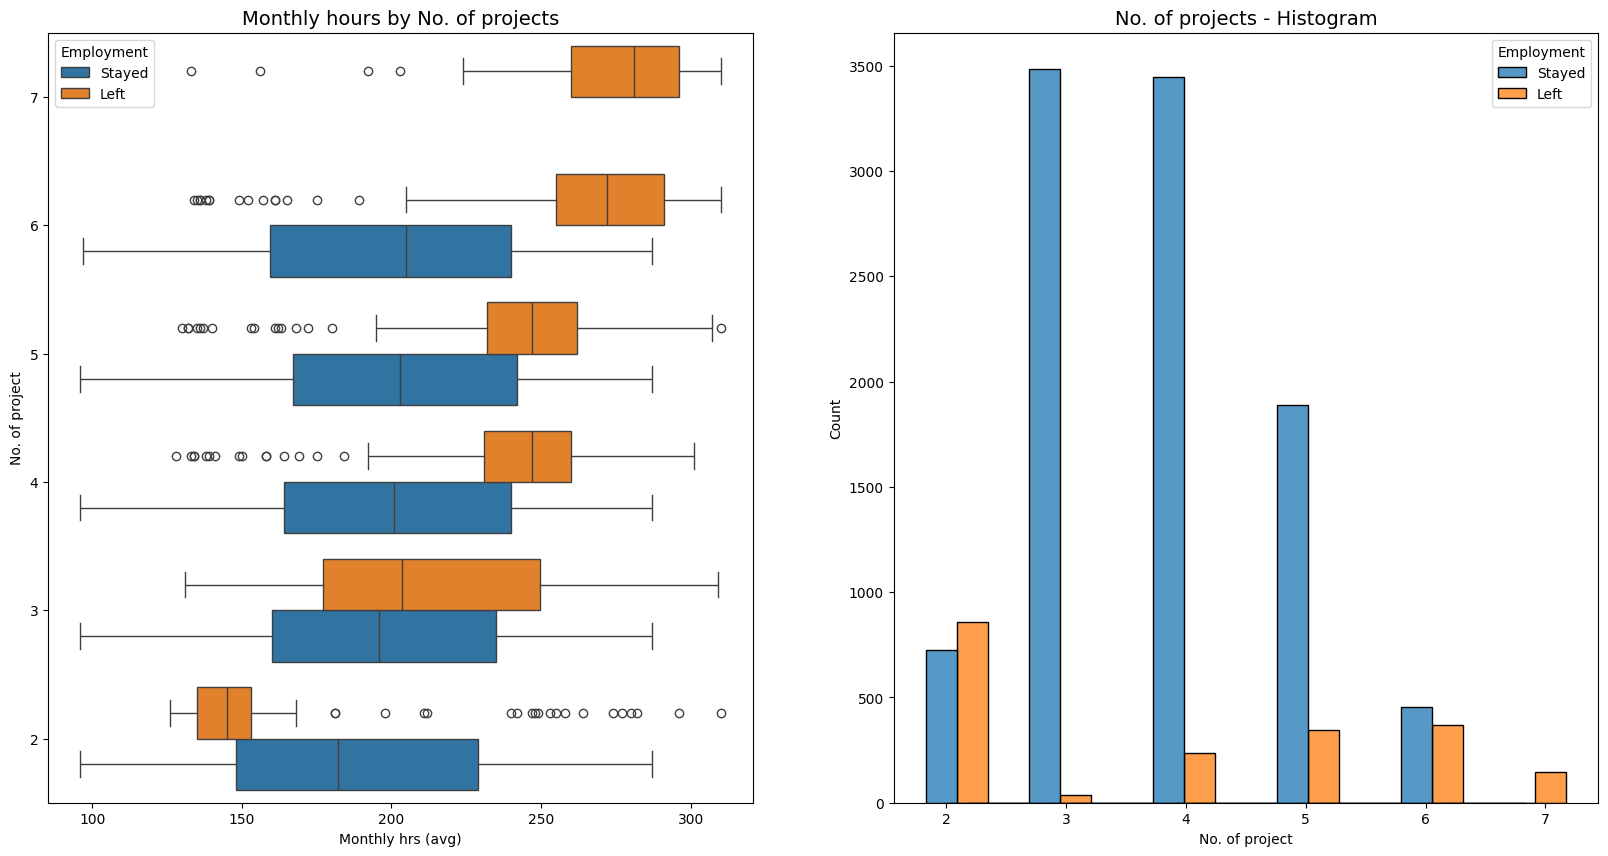

In [16]:
# Monthly hours and No. of projects relation - Boxplot & Histogram

Employment_dummy = ['Stayed', 'Left']
fig, ax = plt.subplots(1, 2, figsize = (20,10))

sns.boxplot(data=df, x='Monthly hrs (avg)', y='No. of project', hue='Employment', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by No. of projects', fontsize='14')
for i, text in enumerate(ax[0].legend_.texts):
    text.set_text(Employment_dummy[i])

sns.histplot(data=df, x='No. of project', hue='Employment', multiple='dodge', shrink=3, ax=ax[1])
ax[1].set_title('No. of projects - Histogram', fontsize='14')
for i, text in enumerate(ax[1].legend_.texts):
    text.set_text(Employment_dummy[i])

plt.show()

Observations and Conclusions:

1) The first diagram clearly shows that employees with 2 projects and 7 projects at hand were no longer in the company. Perhaps 7 projects were too much for an employee to handle and hence they quit. The ones with 2 proejcts were probably fired because they could not even handle 2 projects and perhaps did not display qualities of dynamism in workplace.

2) The second diagram displays a really low employee retention when each employee handles 3-4 projects. It also makes sense since there is a work-life balance and employees are neither fired nor do they quit (mostly).

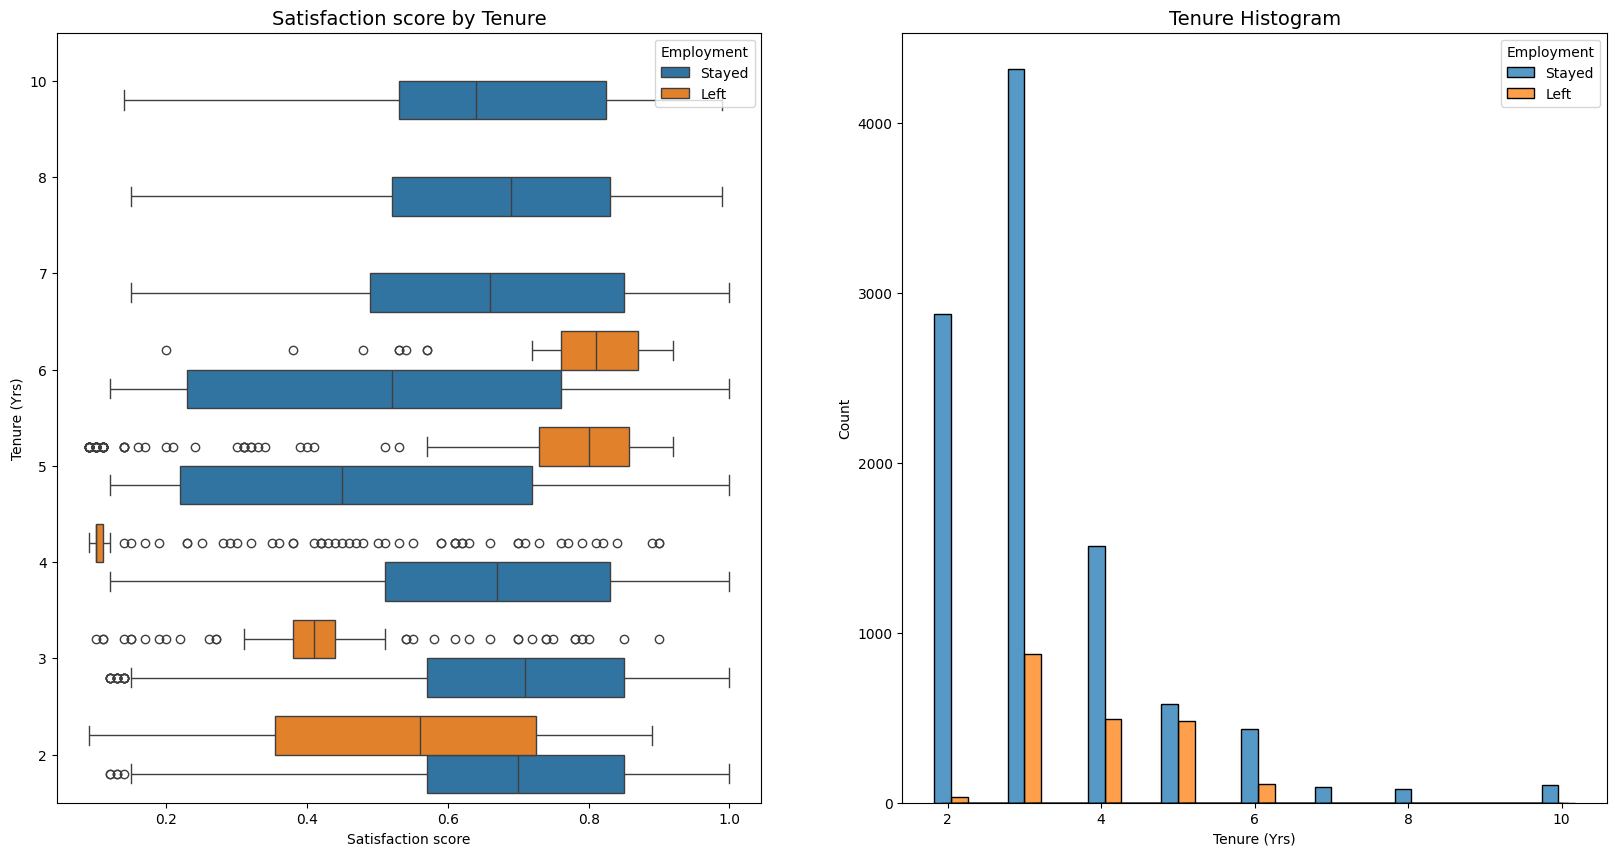

In [17]:
# Employee satisfaction score and tenure - Boxplot & Histogram

fig, ax = plt.subplots(1,2,figsize=(20,10))

sns.boxplot(data=df,x='Satisfaction score', y='Tenure (Yrs)', hue='Employment', orient='h', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction score by Tenure', fontsize=14)
for i, text in enumerate(ax[0].legend_.texts):
    text.set_text(Employment_dummy[i])

sns.histplot(data=df,x='Tenure (Yrs)', multiple='dodge', hue='Employment', shrink=5, ax=ax[1])
ax[1].set_title('Tenure Histogram', fontsize=14)
for i, text in enumerate(ax[1].legend_.texts):
    text.set_text(Employment_dummy[i])

plt.show()

Observations and Conclusions:

1) The first diagram displays that Employees who have tenure more than 7 years (ie. 7 ~ 10 years) have an average satisfaction score of 0.7 (0.5 ~ 0.8). Assume it is like a 7 star rating out of 10. Similar patterns are observed when Employees have a tenure of 4 years or less (2 ~ 4 years).

2) Also note that employees with 7 years of tenure have never left the company and their satisfaction score suggests they are happy in the company. Perhaps it is due to the fact that this office has become their second home and the colleagues are like a second family.

3) The employees who have tenure of less than 4 years were not fired it seems as their Satisfaction levels are really low. So it is safe to assume that most of the employees with less than 4 years tenure left the company and only a handful portion of the employees were fired (2 years tenure but satisfaction score above is 0.7).

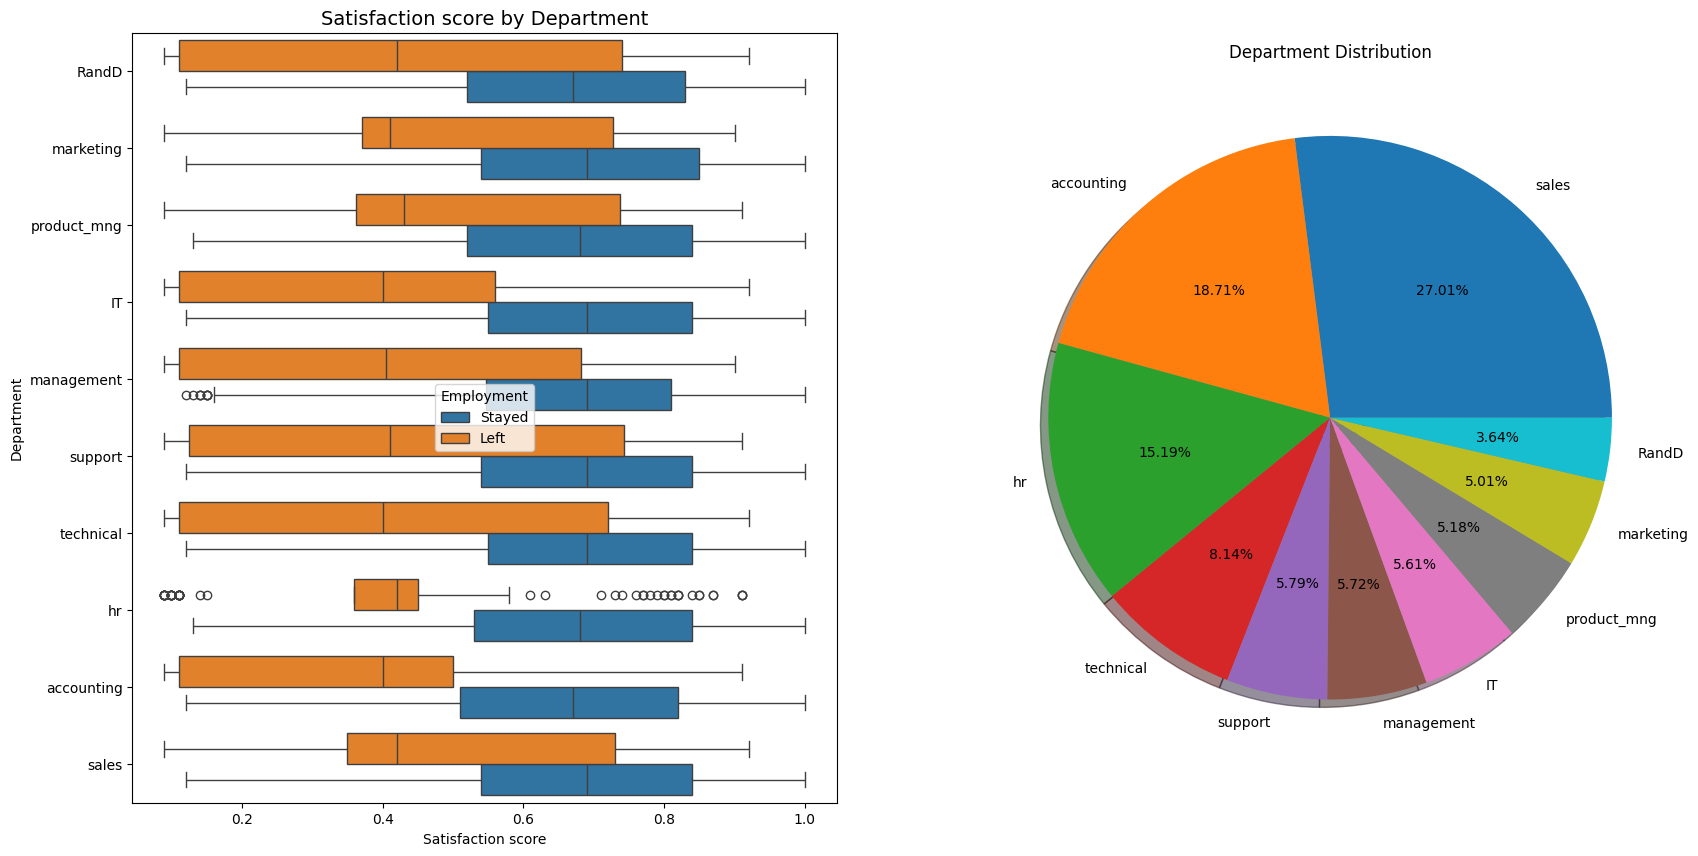

In [18]:
# Department and Satisfaction score - boxplot

fig, ax = plt.subplots(1,2,figsize=(20,10))

sns.boxplot(data=df,x='Satisfaction score', y='Department', hue='Employment', orient='h', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction score by Department', fontsize=14)
for i, text in enumerate(ax[0].legend_.texts):
    text.set_text(Employment_dummy[i])

plt.pie(df['Department'].value_counts(), labels=df['Department'].unique(), autopct='%1.2f%%', shadow=True)
plt.title('Department Distribution')
plt.show()

Observations and Conclusions:

1) Looking at the boxplot on the left, we see a pattern where Employees with Satisfaction score > 0.5 stayed. This could indicate that across all the departments, employees are satisfied and hence decided to stay.

2) As for the ones who left, some IT, HR and Accounting department employees were really unhappy and hence left (not fired from) the company whereas every other department had employees who (satisfaction score < 0.5) left the company and others who (satisfaction score > 0.5) were fired from the company.

3) Referring the results of the boxplot to the piechart on the right, we can derive that Sales has had the largest workforce followed by Accounting (both of which had really large employee retention), perhaps there is an arising problem of Senior employees or managers preferring certain employees over others.

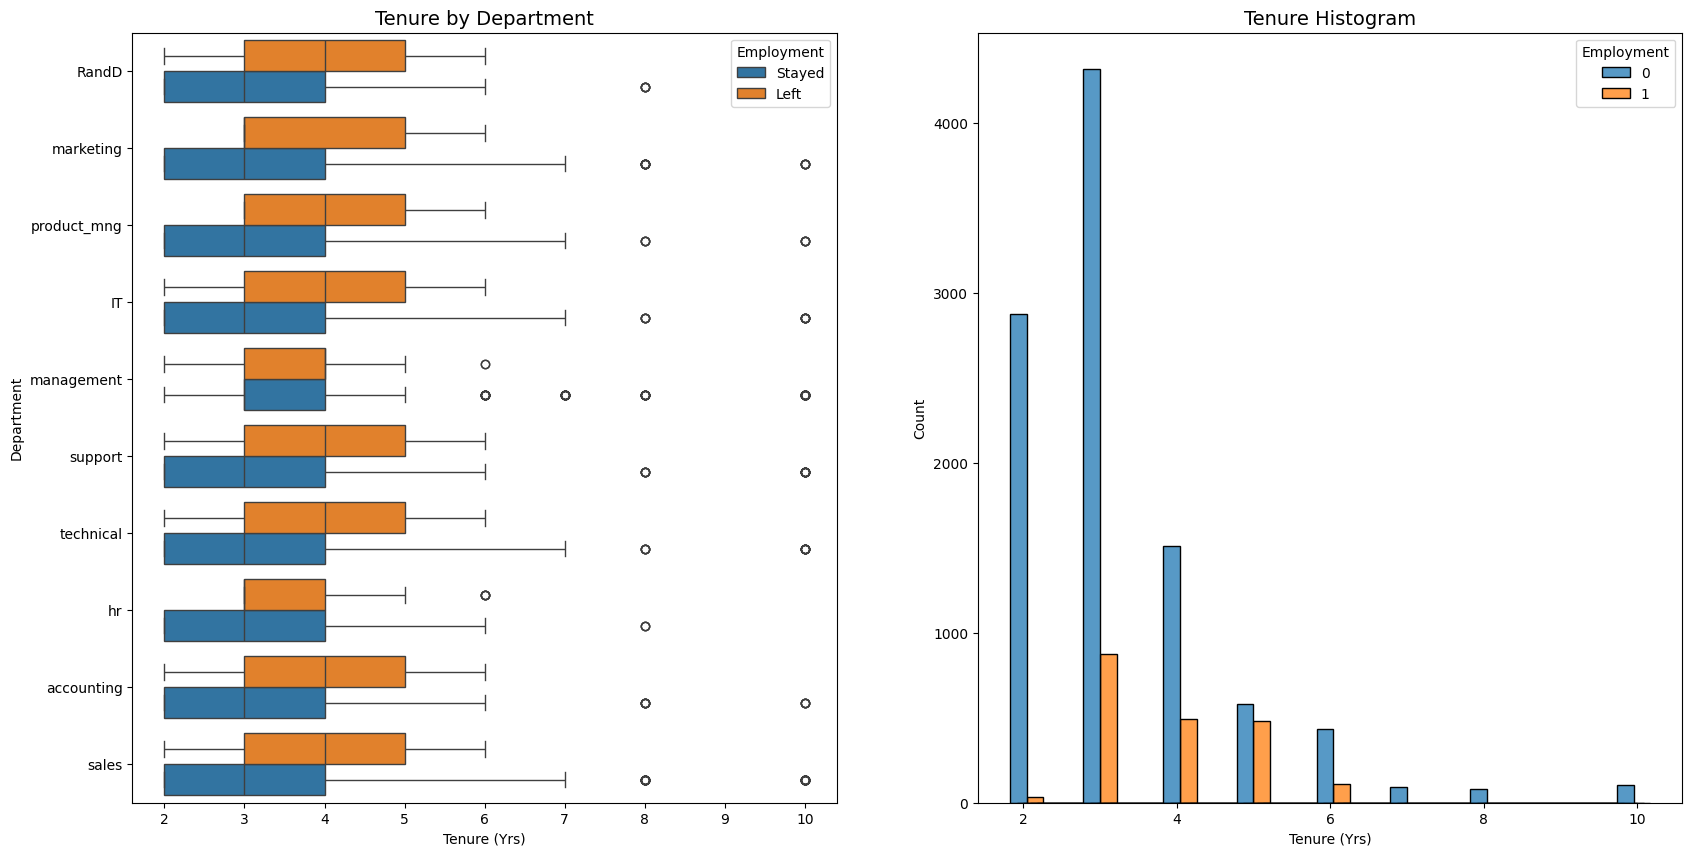

In [19]:
# Department and Tenure - boxplot

fig, ax = plt.subplots(1,2,figsize=(20,10))

sns.boxplot(data=df,x='Tenure (Yrs)', y='Department', hue='Employment', orient='h', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Tenure by Department', fontsize=14)
for i, text in enumerate(ax[0].legend_.texts):
    text.set_text(Employment_dummy[i])

sns.histplot(data=df,x='Tenure (Yrs)', multiple='dodge', hue='Employment', shrink=5, ax=ax[1])
ax[1].set_title('Tenure Histogram', fontsize=14)

plt.show()

Obesrvations and Conclusions:

1) From the boxplot on the left, we can infer that the HR and Management departments are the only ones where Employees left or are fired between a Tenure of 3-4 years. Whereas, all other departments are following a trend where the Employees stay for 2-4 years but leave the company between 4-5 years indicating a lack of promotion after 5 years of staying in the company.

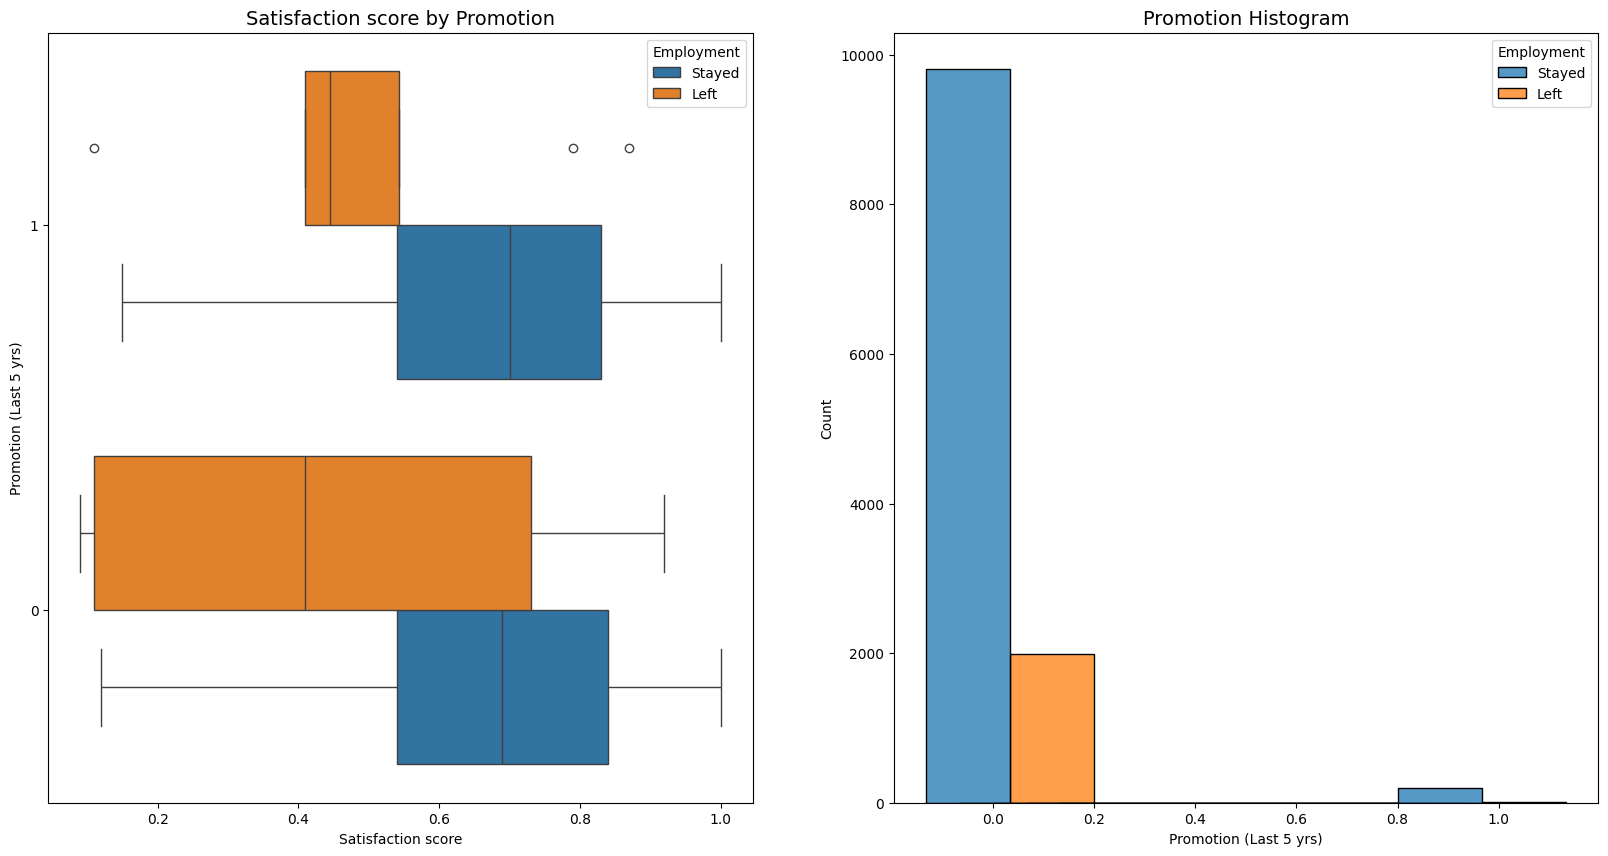

In [20]:
# Promotion and Satisfaction score

fig, ax = plt.subplots(1,2,figsize=(20,10))

sns.boxplot(data=df,x='Satisfaction score', y='Promotion (Last 5 yrs)', hue='Employment', orient='h', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction score by Promotion', fontsize=14)
for i, text in enumerate(ax[0].legend_.texts):
    text.set_text(Employment_dummy[i])

sns.histplot(data=df,x='Promotion (Last 5 yrs)', multiple='dodge', hue='Employment', shrink=5, ax=ax[1])
ax[1].set_title('Promotion Histogram', fontsize=14)
for i, text in enumerate(ax[1].legend_.texts):
    text.set_text(Employment_dummy[i])

plt.show()

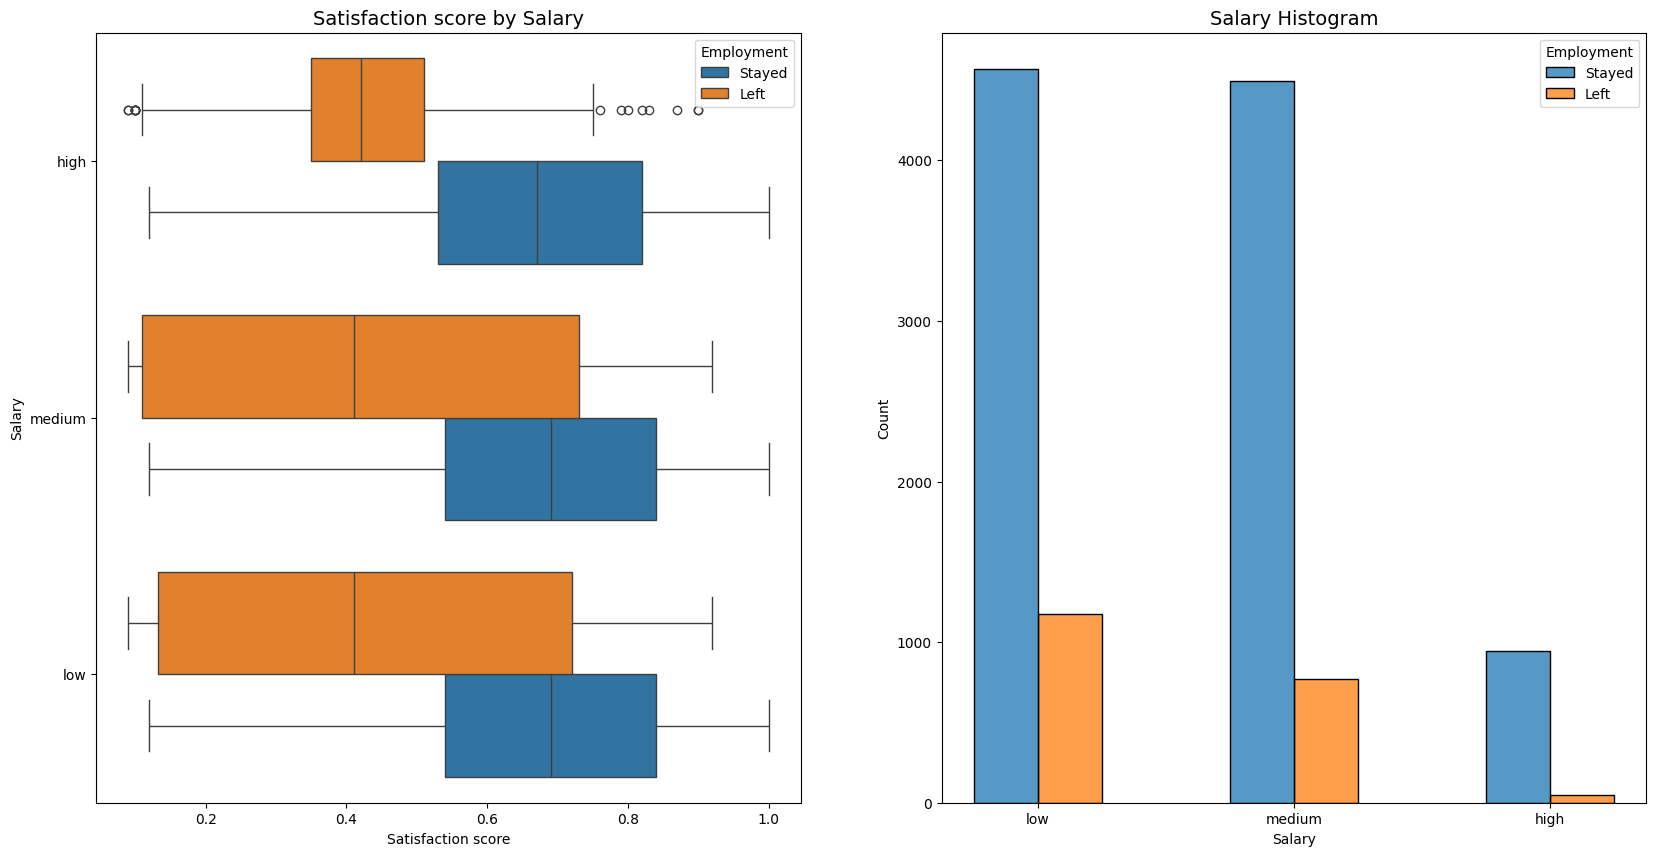

In [21]:
# Satisfaction score and Salary

fig, ax = plt.subplots(1,2,figsize=(20,10))

sns.boxplot(data=df,x='Satisfaction score', y='Salary', hue='Employment', orient='h', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction score by Salary', fontsize=14)
for i, text in enumerate(ax[0].legend_.texts):
    text.set_text(Employment_dummy[i])

sns.histplot(data=df,x='Salary', multiple='dodge', hue='Employment', shrink=0.5, ax=ax[1])
ax[1].set_title('Salary Histogram', fontsize=14)
for i, text in enumerate(ax[1].legend_.texts):
    text.set_text(Employment_dummy[i])

plt.show()

Observations and Conclusions:

1) Here, from the boxplot on the left we can see that there was a big retention for employees who had a high salary but low satisfaction score, which might have been caused by toxic work environment or bad team lead. Also there are some outliers which indicate these employees were fired as they had high salary and high satisfaction score hence, no possible reason for them to leave the company but maybe they were too expensive for the company.

2) The biggest retention were from employees who have Medium salary. There are a lot of employees who have low satisfaction score (they left the company perhaps for a better salary or work environment) and those who have high satisfaction score (probably fired).

3) As for the employees with low salary, a lot of them left the company (indicated by the low satisfaction score) and a few (with high satisfaction scores) were fired (probably because they did not perform that well).

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Evaluate the model

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [23]:
# Preprocessing data to be fed into Neural network

# Ordinal encoding for 'Salary'
salary_mapping = {'low': 0, 'medium': 1, 'high': 2}
df['Salary'] = df['Salary'].map(salary_mapping)

# One hot encoding for 'Department'
df = pd.get_dummies(df, columns=['Department'])

# Defining X and y for the model
X = df.drop('Employment', axis=1)
y = df['Employment']

print(X)
print(y)

       Satisfaction score  Employee score  No. of project  Monthly hrs (avg)  \
0                    0.38            0.53               2                157   
1                    0.80            0.86               5                262   
2                    0.11            0.88               7                272   
3                    0.72            0.87               5                223   
4                    0.37            0.52               2                159   
...                   ...             ...             ...                ...   
11995                0.90            0.55               3                259   
11996                0.74            0.95               5                266   
11997                0.85            0.54               3                185   
11998                0.33            0.65               3                172   
11999                0.50            0.73               4                180   

       Tenure (Yrs)  Accident during wo

In [24]:
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Test and train dataset split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)  # 80% train, 20% test

In [25]:
# tensorflow deep learning neural network

# Model definition
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer and hidden layer 1
    layers.Dropout(0.2), #Dropout to prevent overfitting
    layers.Dense(32, activation='relu'),  # Hidden layer 2
    layers.Dropout(0.2), #Dropout to prevent overfitting
    layers.Dense(16, activation='relu'),  # Hidden layer 3
    layers.Dense(1, activation='sigmoid')  # Output layer (sigmoid for binary classification)
])

# Model compilation
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model training
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split = 0.2)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


240/240 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6896 - loss: 0.5487 - val_accuracy: 0.8958 - val_loss: 0.2323
Epoch 2/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8906 - loss: 0.2639 - val_accuracy: 0.9427 - val_loss: 0.1690
Epoch 3/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9252 - loss: 0.2098 - val_accuracy: 0.9567 - val_loss: 0.1433
Epoch 4/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9417 - loss: 0.1687 - val_accuracy: 0.9609 - val_loss: 0.1360
Epoch 5/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9387 - loss: 0.1768 - val_accuracy: 0.9661 - val_loss: 0.1255
Epoch 6/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9484 - loss: 0.1562 - val_accuracy: 0.9666 - val_loss: 0.1225
Epoch 7/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9528 - loss: 0.1487 - val_accuracy: 0.9677 - val_loss: 0.1167
Epoch 8/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9547 - loss: 0.1460 - val_accuracy: 0.9682 - val_

In [26]:
# Model performance

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss*100} %")
print(f"Test Accuracy: {accuracy*100} %")



75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9665 - loss: 0.1665
Test Loss: 13.375355303287506 %
Test Accuracy: 96.99875116348267 %


In [27]:
# Model Testing
from sklearn.metrics import roc_auc_score, precision_score, recall_score, accuracy_score, f1_score, confusion_matrix,roc_curve

y_pred_prob = model.predict(X_test)  # Get probabilities for AUC
y_pred = (y_pred_prob > 0.5).astype(int) # Get binary predictions (0 or 1)

# Evaluation Metrics

auc = roc_auc_score(y_test, y_pred_prob)
print('AUC: ',auc*100,' %')

precision = precision_score(y_test, y_pred)
print('Precision: ',precision*100,' %')

recall = recall_score(y_test, y_pred)
print('Recall: ',recall*100,' %')

accuracy = accuracy_score(y_test, y_pred)
print('ACcuracy: ',accuracy*100,' %')

f1 = f1_score(y_test, y_pred)
print('F1 score: ',f1*100,' %')

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
AUC:  97.17398196201191  %
Precision:  94.33962264150944  %
Recall:  87.28179551122194  %
ACcuracy:  96.99874947894956  %
F1 score:  90.67357512953367  %


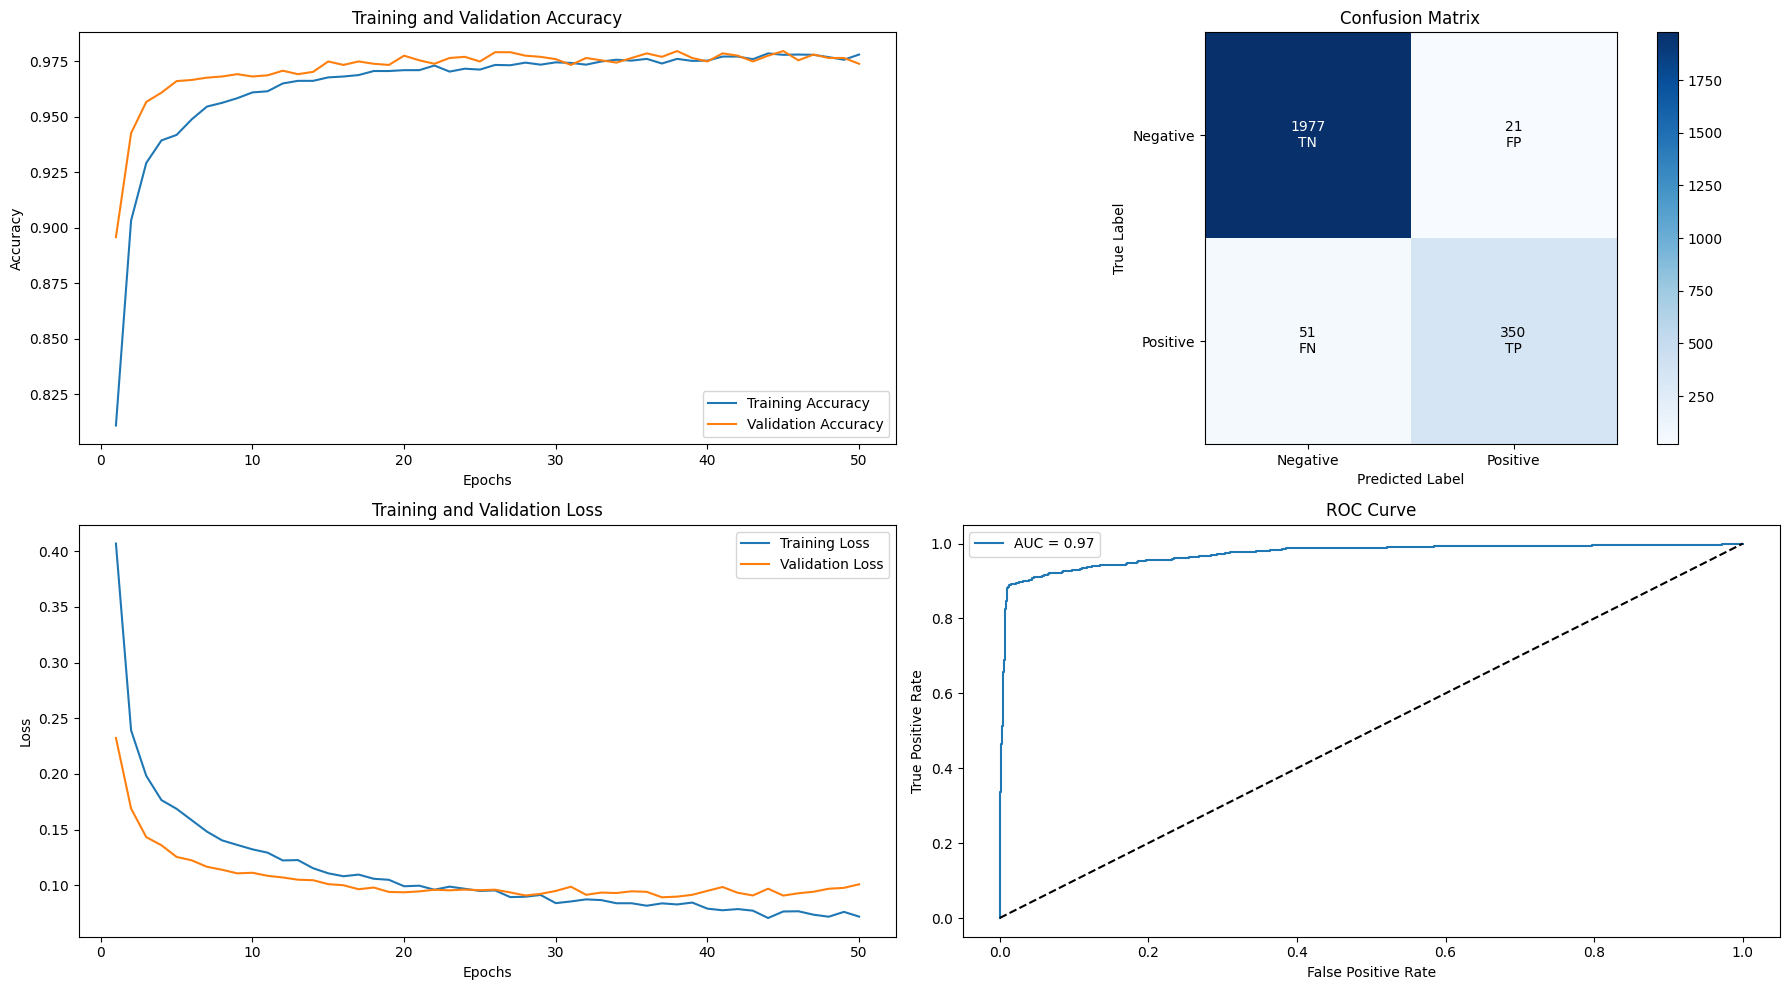

In [28]:
# Visualizing the results

epochs = range(1, len(history.history['loss']) + 1)

# Create ONE figure with subplots
plt.figure(figsize=(18, 10))  # Adjust the overall figure size as needed

# 1. Confusion Matrix (Subplot 1)
plt.subplot(2, 2, 1)  # 2 rows, 2 columns, first plot
plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


# 2. Training/Validation Accuracy (Subplot 2)
plt.subplot(2, 2, 2)  # 2 rows, 2 columns, second plot
cm = confusion_matrix(y_test, y_pred)
class_labels = ["Negative", "Positive"]
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    cell_label = ""
    if i == 0 and j == 0:
        cell_label = "TN"
    elif i == 0 and j == 1:
        cell_label = "FP"
    elif i == 1 and j == 0:
        cell_label = "FN"
    elif i == 1 and j == 1:
        cell_label = "TP"

    plt.text(j, i, format(cm[i, j], 'd') + "\n" + cell_label,
             horizontalalignment="center",
             verticalalignment="center",
             color="white" if cm[i, j] > thresh else "black")


# 3. Training/Validation Loss (Subplot 3)
plt.subplot(2, 2, 3)  # 2 rows, 2 columns, third plot
plt.plot(epochs, history.history['loss'], label='Training Loss')
plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 4. ROC Curve (Subplot 4)
plt.subplot(2, 2, 4)  # 2 rows, 2 columns, fourth plot
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob) # Corrected variable name here
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

plt.tight_layout()  # Call tight_layout ONCE for the entire figure
plt.show()